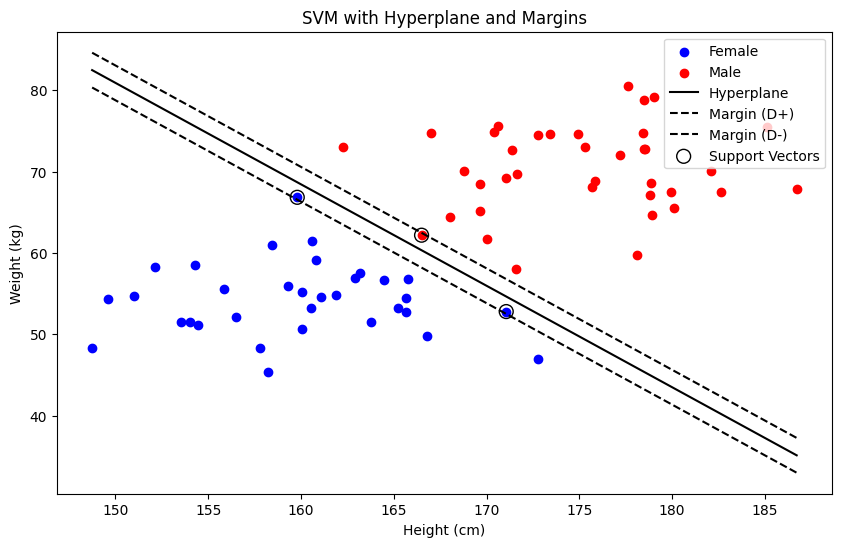

Hyperplane: w = [0.67456741 0.54055097], b = -144.9251341434628
Margin: 1.1568337428798683
Support Vectors:
[[159.80025809  66.83822095]
 [171.0611506   52.78392224]
 [166.49911267  62.17770327]]


In [4]:
# Import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Generate synthetic data
female_height = np.random.normal(160, 5, 50)
female_weight = np.random.normal(55, 5, 50)
female_labels = np.zeros(50) 

male_height = np.random.normal(175, 5, 50)
male_weight = np.random.normal(70, 5, 50)
male_labels = np.ones(50) 

height = np.concatenate((female_height, male_height))
weight = np.concatenate((female_weight, male_weight))
labels = np.concatenate((female_labels, male_labels))

features = np.column_stack((height, weight))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Train the SVM model
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Get hyperplane parameters
w = svm.coef_[0]  # Coefficients for the hyperplane
b = svm.intercept_[0]  # Intercept term

# Calculate the margin
margin = 1 / np.linalg.norm(w)

# Define the hyperplane equation: w0*x + w1*y + b = 0
x_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
hyperplane = -(w[0] / w[1]) * x_vals - (b / w[1])  # Decision boundary
margin_positive = hyperplane + margin / w[1]  # Positive margin (D+)
margin_negative = hyperplane - margin / w[1]  # Negative margin (D-)

# Step 4: Visualize results
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='blue', label='Female')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='red', label='Male')

# Plot the hyperplane and margins
plt.plot(x_vals, hyperplane, 'k', label='Hyperplane')
plt.plot(x_vals, margin_positive, 'k--', label='Margin (D+)')
plt.plot(x_vals, margin_negative, 'k--', label='Margin (D-)')

# Highlight support vectors
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, edgecolors='k', facecolors='none', label='Support Vectors')

# Add labels, legend, and title
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('SVM with Hyperplane and Margins')
plt.legend(loc='upper right')

plt.show()

# Step 5: Output key information
print(f"Hyperplane: w = {w}, b = {b}")
print(f"Margin: {margin}")
print(f"Support Vectors:\n{svm.support_vectors_}")
